# ADALINE

In [43]:
import numpy as np
import matplotlib.pyplot as plt


class Adaline:

    def __init__(self, n_iterations=100, learning_rate=0.01):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = None

    def random_weights(self, X, random_state: int):
        """
        Creates a vector of random weights
        Parameters
        ----------
        X : 2-dimentional array, shape =[n_samples, n_features]

        Returns
        ---------
        w: array, shape [w_bias + n_features
        """
        rand = np.random.RandomState(random_state)
        w = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        return w

    def net_input(self, X, w):
        """
        Calculates the net input
        Parameters
        ----------
        X : 2-dimentional array, shape =[n_samples, n_features]
        w: array, shape [w_bias + n_features]

        Returns
        ---------
        net_input: array, shape [n_samples]
        """
        return (X @ w[1:]) + w[0]

    def predict(self, X, w):
        """
        Predicts the class label
        Parameters
        ----------
        X : 2-dimentional array, shape =[n_samples, n_features]
        w: array, shape [w_bias + n_features]

        Returns
        ---------
        y_pred: array, shape [n_samples]
        """
        return np.where(self.net_input(X, w) >= 0.0, 1, -1)

    def fit(self, X, y):
        mse_iteration = []
        self.weights = self.random_weights(X, random_state=1)
        print(f'Initial weights: {self.weights}')
        for pair in range(self.n_iterations):
            output = self.net_input(X, self.weights)
            gradient = 2 * (y - output)
            self.weights[1:] += self.learning_rate * gradient @ X
            self.weights[0] += self.learning_rate * gradient.sum()
            mse = ((y - output) ** 2).sum() / len(y)
            mse_iteration.append(mse)
        return self.weights, mse_iteration

## Application:  Wandering Albatross vs Great Horned Owl

In [44]:
def species_generator(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
	'''creates [n_samples, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
	rand = np.random.RandomState(seed)
	f1 = rand.normal(mu1, sigma1, n_samples)
	f2 = rand.normal(mu2, sigma2, n_samples)
	X = np.concatenate([f1, f2])
	y = np.full(n_samples, target)
	return f1, f2, y

In [45]:
albatross_weight_mean = 9000
albatross_weight_std = 800
albatross_wing_span_mean = 300
albatross_wing_span_std = 20
n_samples = 100
target = 1
seed = 100

aX1, aX2, ay = species_generator(albatross_weight_mean, albatross_weight_std, albatross_wing_span_mean,
													 albatross_wing_span_std, n_samples, target, seed)


In [46]:
owl_weight_mean = 1000  # in grams
owl_weight_variance = 200  # in grams
owl_wingspan_mean = 100  # in cm
owl_wingspan_variance = 15  # in cm
n_samples = 100
target = -1
seed = 100

# oX: feature matrix (weight, wingspan)
# oy: target value (1)
oX1, oX2, oy = species_generator(owl_weight_mean, owl_weight_variance,
													 owl_wingspan_mean, owl_wingspan_variance,
													 n_samples, target, seed)

Initial weights: [ 0.01624345 -0.00611756 -0.00528172]
Final weights: [nan nan nan]


/tmp/ipykernel_904329/135392306.py:64: RuntimeWarning: overflow encountered in square
  mse = ((y - output) ** 2).sum() / len(y)
/tmp/ipykernel_904329/135392306.py:62: RuntimeWarning: overflow encountered in matmul
  self.weights[1:] += self.learning_rate * gradient @ X
/tmp/ipykernel_904329/135392306.py:62: RuntimeWarning: invalid value encountered in add
  self.weights[1:] += self.learning_rate * gradient @ X


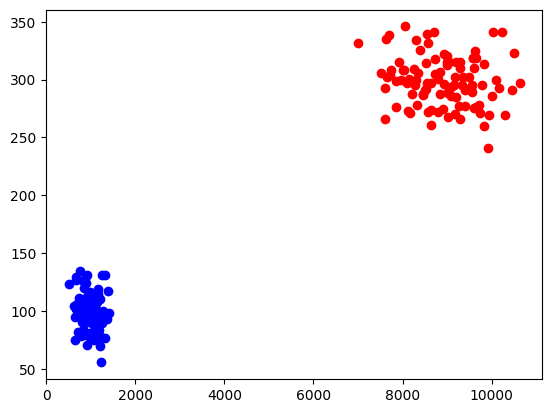

In [47]:

X = np.stack([np.concatenate([aX1, aX2]), np.concatenate([oX1, oX2])], axis=1)
y = np.concatenate([ay, oy])

plt.scatter(aX1, aX2, color= 'red')
plt.scatter(oX1, oX2, color = 'blue')


ada = Adaline(n_iterations=100, learning_rate=0.01)

weigths, mse_iter = ada.fit(X, y)

print(f'Final weights: {weigths}')
